## This notebook describes how can we get the time duration when a particular GW detector is contributing to the observing run i.e. collecting the GW-strain data

Reference: http://pycbc.org/pycbc/latest/html/dataquality.html#determine-the-times-an-instrument-has-valid-data

<br>

In [2]:
#-- import modules --

import numpy as np
import matplotlib.pyplot as plt

from pycbc import dq
from pycbc.results import ifo_color

### Here we look for the query times of Detectors for GW170817 event

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


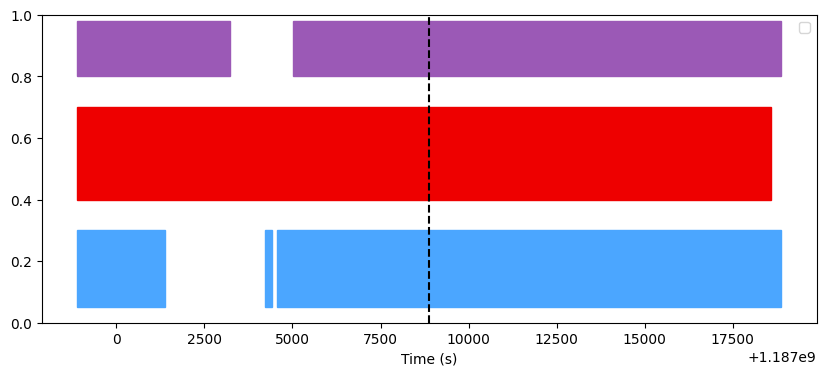

In [3]:
#-- we start from 10000 secs before the trigTime of GW170817 and till 10000 secs after the trigTime 
#-- in all we query for 20000 seconds of the data --

trigTime = 1187008882    # secs        (to be precise it was recorded to be 1187008882.4 LIGO GPS secs)

query_pre_tc = 10000     # secs
query_post_tc = 10000    # secs

start_time = trigTime - query_pre_tc 
end_time = trigTime + query_post_tc

# Get times that the Hanford detector has data
hsegs = dq.query_flag('H1', 'DATA', start_time, end_time)

# Get times that the Livingston detector has data
lsegs = dq.query_flag('L1', 'DATA', start_time, end_time)

# Get times that the Livingston detector has data
vsegs = dq.query_flag('V1', 'DATA', start_time, end_time)


# plots 

plt.figure(figsize=[10,4])

for seg in lsegs:
    start, end = seg
    plt.axvspan(start, end, color=ifo_color('L1'), ymin=0.05, ymax=0.3)

for seg in hsegs:
    start, end = seg
    plt.axvspan(start, end, color=ifo_color('H1'), ymin=0.4, ymax=0.7)
    
for seg in vsegs:
    start, end = seg
    plt.axvspan(start, end, color=ifo_color('V1'), ymin=0.8, ymax=0.98)
    
plt.axvline(x=trigTime, ls='--', c='k')
plt.legend()
plt.xlabel('Time (s)')
plt.show()

### Note for the colors and corresponding detectors 

* L1 : Blue

* H1 : Red

* V1 : Violet